In [ ]:
import csv
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df= pd.read_csv(r"/content/drive/MyDrive/Merged_Preprocessed_Data_Updated.csv")

# EDA

Positive    108391
Negative     95467
Neutral      19751
Name: sentiment, dtype: int64


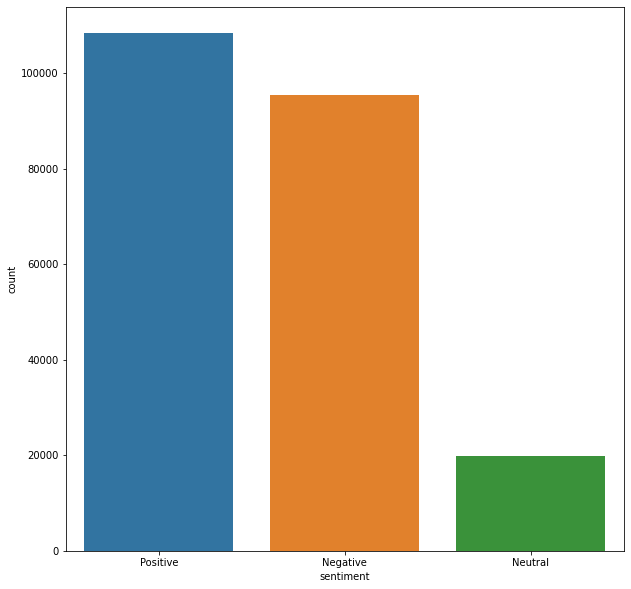

In [ ]:
print(df['sentiment'].value_counts())
plt.figure(figsize=(10,10)) #Plot a bigger figure
sns.countplot(x='sentiment',data=df)

Top 30 negative with Frequency
appointment  148490
doctor  117688
surgery  91603
get  90503
time  74450
told  55689
receptionist  49207
patient  48309
one  46281
see  45412
gp  44079
day  43994
staff  43812
week  40905
practice  40335
phone  40099
would  38361
call  37586
need  34458
reception  28664
never  28517
go  28001
back  27760
rude  27599
service  27315
even  26849
dont  26240
year  26146
make  24794
work  22026
Top 30 pos with Frequency
doctor  103673
surgery  85120
always  66540
appointment  64852
staff  64132
practice  53885
time  46801
patient  38383
year  38019
service  35198
helpful  33795
gp  33268
care  32140
get  30422
nurse  30005
would  28459
good  25796
one  23571
day  23076
reception  22995
friendly  22167
see  22060
receptionist  21985
excellent  20800
problem  19655
feel  18526
thank  18508
well  17892
need  17714
seen  17450
Top 30 neutral with Frequency
appointment  26822
doctor  25336
surgery  17347
time  15159
get  14434
one  9297
staff  9220
patient  9118
se

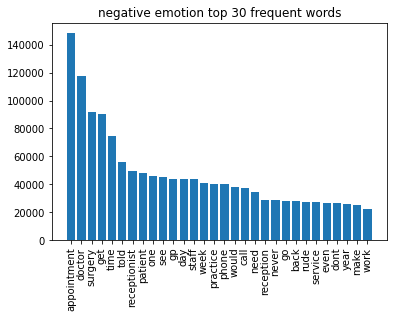

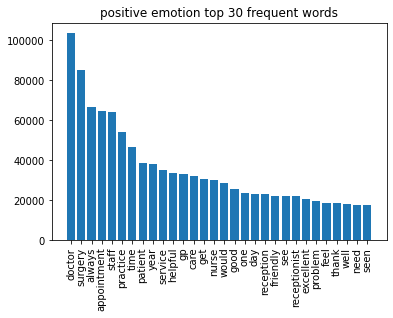

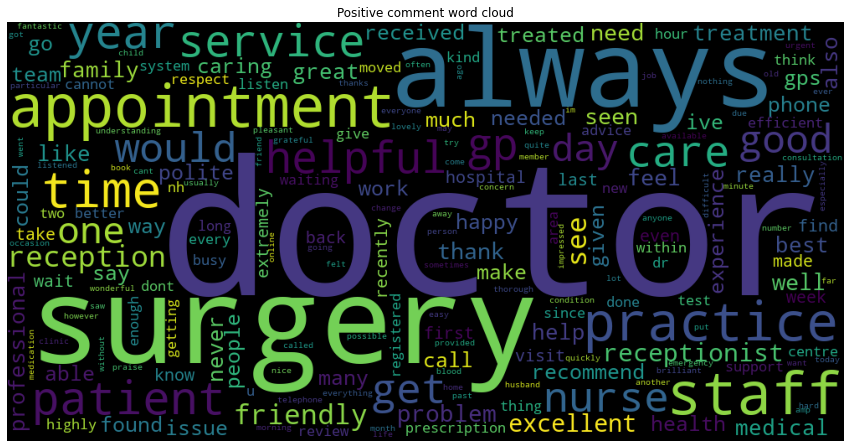

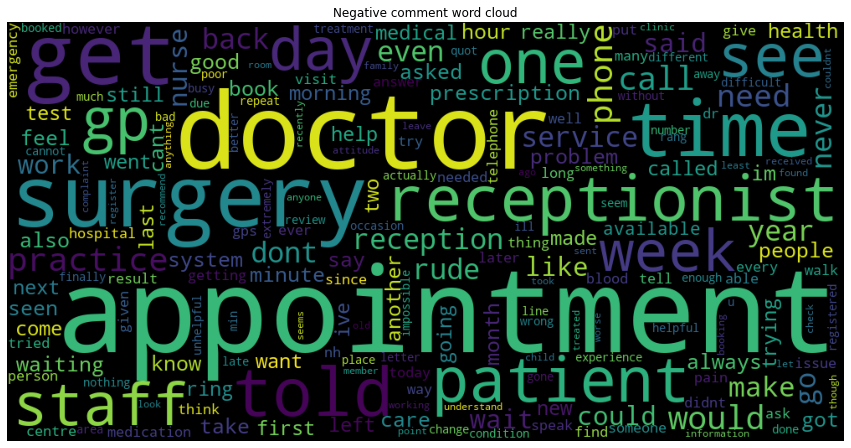

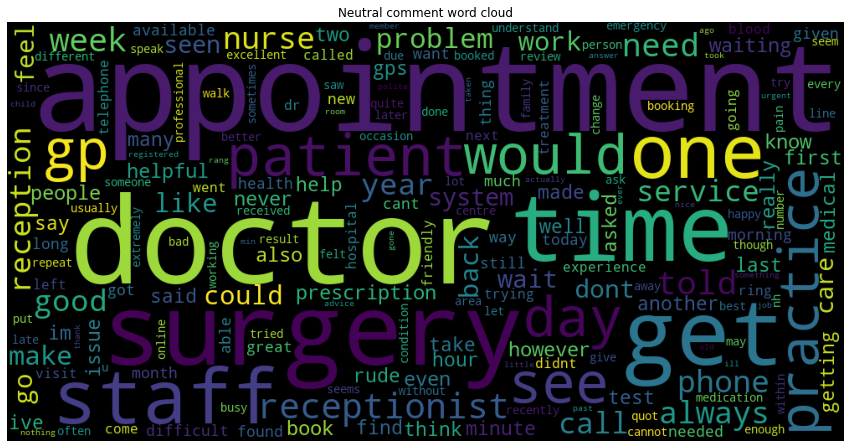

In [ ]:
from collections import Counter
import numpy as np

positive = df[df['sentiment'] == 'Positive']
pos_list = positive['comment'].unique().tolist()
negative = df[df['sentiment'] == 'Negative']
neg_list = negative['comment'].unique().tolist()
neutral = df[df['sentiment'] == 'Neutral']
neu_list = neutral['comment'].unique().tolist()


pos_list = (' '.join(str(i)for  i in pos_list)).split(' ')
neg_list = (' '.join(str(i)for  i in neg_list)).split(' ')
neu_list = (' '.join(str(i)for  i in neu_list)).split(' ')
top30_neg =dict(Counter(neg_list).most_common(30))
top30_pos = dict(Counter(pos_list).most_common(30))
top30_neu = dict(Counter(neu_list).most_common(30))

print("Top 30 negative with Frequency")
for x, y in top30_neg.items():
  print(f'{x}  {y}')
print("Top 30 pos with Frequency")
for x, y in top30_pos.items():
  print(f'{x}  {y}')
print("Top 30 neutral with Frequency")
for x, y in top30_neu.items():
  print(f'{x}  {y}')
  
plt.bar(top30_neg.keys(), top30_neg.values())
plt.xticks(rotation = 90)
plt.title('negative emotion top 30 frequent words')
plt.show()

plt.bar(top30_pos.keys(), top30_pos.values())
plt.xticks(rotation = 90)
plt.title('positive emotion top 30 frequent words')
plt.show()

from wordcloud import WordCloud
def wordcloud(list, title):
  word_could_dict=Counter(list)
  wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
  plt.figure(figsize=(15,8))
  plt.title(title)
  plt.imshow(wordcloud)
  plt.axis("off")

wordcloud(pos_list,'Positive comment word cloud')
wordcloud(neg_list,'Negative comment word cloud')
wordcloud(neu_list,'Neutral comment word cloud')

# COUNT VECTORIZATION

In [ ]:
import csv
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import itertools
import nltk
from nltk import word_tokenize
df= pd.read_csv(r"/content/drive/MyDrive/SUBSETOFDATA.csv") # unable to use original size of data, too large and cause crashing. Subset of data (2000 rows) are used 
X = df['comment']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .2)
#combined_list = (df['comment'].apply(lambda x: np.str_(x))).unique().tolist()

sentiment_train = y_train.unique().tolist()
data_combined = pd.DataFrame(index = sentiment_train)

#combined_list = (' '.join(str(i)for  i in combined_list)).split(' ')
#print (combined_list)
def combine_text(sentiment):
    '''Takes a list of text and combines them into one large chunk of text.'''
    sentiment_list = df[y == sentiment]['comment'].tolist()
    combined_text = ' '.join(str(i)for  i in sentiment_list)
    return combined_text

vocab_length = len(np.array(y_train)) #concatenate all the texts 
for i in range(0, len(sentiment_train)):
    data_combined.loc[[sentiment_train[i]],["comment"]] = combine_text(sentiment_train[i])
data_combined['sentiment'] = sentiment_train
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_combined.comment)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_combined.index
data_dtm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aback,abbey,abc,abcess,abdo,abdominal,ablation,able,abrasion,abroad,...,xrays,yeah,year,yesterday,yorkshire,young,younger,youre,youve,yr
Positive,1,5,1,1,1,2,1,3,1,1,...,0,1,52,7,0,4,1,1,1,8
Negative,0,0,0,0,0,1,0,2,0,0,...,2,0,8,3,1,1,1,0,0,4
Neutral,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_dtm.to_pickle("data_cv.pkl") # save the file
data_dtm = pd.read_pickle('data_cv.pkl')
data_dtm = data_dtm.transpose()
data_dtm

,Positive,Negative,Neutral
aback,1,0,0
abbey,5,0,0
abc,1,0,0
abcess,1,0,0
abdo,1,0,0
...,...,...,...
young,4,1,0
younger,1,1,0
youre,1,0,0
youve,1,0,0


# TF-IDF VECTORIZATION

In [ ]:
import csv
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools
import nltk
from nltk import word_tokenize
from sklearn.model_selection import train_test_split

v = TfidfVectorizer()
df= pd.read_csv(r"/content/drive/MyDrive/SUBSETOFDATA.csv") # unable to use original size of data, too large and cause crashing. Subset of data (2000 rows) are used 
X = df['comment']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .2)
#combined_list = (df['comment'].apply(lambda x: np.str_(x))).unique().tolist()

sentiment_train = y_train.unique().tolist()
data_combined = pd.DataFrame(index = sentiment_train)

#combined_list = (' '.join(str(i)for  i in combined_list)).split(' ')
#print (combined_list)
def combine_text(sentiment):
    '''Takes a list of text and combines them into one large chunk of text.'''
    sentiment_list = df[y == sentiment]['comment'].tolist()
    combined_text = ' '.join(str(i)for  i in sentiment_list)
    return combined_text

vocab_length = len(np.array(y_train)) #concatenate all the texts 
for i in range(0, len(sentiment_train)):
    data_combined.loc[[sentiment_train[i]],["comment"]] = combine_text(sentiment_train[i])
data_combined['sentiment'] = sentiment_train

vectorizer = TfidfVectorizer(ngram_range = (1,3), max_features = vocab_length) #make Tfidf Vectorizer
tf_idfvec = vectorizer.fit_transform(np.array(data_combined.comment.apply(lambda x: np.str_(x)))) #encode the text      
datadf = pd.DataFrame(list(tf_idfvec.toarray()), columns=vectorizer.get_feature_names())# visualise tf-idf score in dp
datadf.index = data_combined.index
datadf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abbey,abdominal,able,absolutely,absolutely fantastic,absolutely nothing,acad,access,accident,accident emergency,...,year old,year old daughter,year old father,year old mother,year old son,yesterday,yet,young,yr,yr old
Positive,0.007791,0.00237,0.003555,0.018961,0.004675,0.009349,0.006233,0.005925,0.012466,0.007791,...,0.021331,0.007791,0.00237,0.00237,0.00237,0.008295,0.00474,0.00474,0.00948,0.005925
Negative,0.000000,0.00932,0.018640,0.018640,0.000000,0.000000,0.000000,0.018640,0.000000,0.000000,...,0.046600,0.000000,0.00932,0.00932,0.00932,0.027960,0.00932,0.00932,0.03728,0.037280
Neutral,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000


In [ ]:
datadf.to_pickle("data_tfidf.pkl") # save the file
data = pd.read_pickle('data_tfidf.pkl')
data = data.transpose()
data

,Positive,Negative,Neutral
abbey,0.007791,0.00000,0.0
abdominal,0.002370,0.00932,0.0
able,0.003555,0.01864,0.0
absolutely,0.018961,0.01864,0.0
absolutely fantastic,0.004675,0.00000,0.0
...,...,...,...
yesterday,0.008295,0.02796,0.0
yet,0.004740,0.00932,0.0
young,0.004740,0.00932,0.0
yr,0.009480,0.03728,0.0


In [ ]:
# To install the requirements for the entire chapter, uncomment the lines below and run this cell

# ===========================

# try :
#     import google.colab
#     !curl https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch3/ch3-requirements.txt | xargs -n 1 -L 1 pip install
# except ModuleNotFoundError :
#     !pip install -r "ch3-requirements.txt"

# ===========================

In [ ]:
#from gensim.models import KeyedVectors
#filename = '/content/drive/MyDrive/nlp eda&word embed/GoogleNews-vectors-negative300.bin'
#model = KeyedVectors.load_word2vec_format(filename, binary=True)

# BERT EMBEDDING

In [ ]:
!pip install transformers==4.9.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 35.2 MB/s 
     |████████████████████████████████| 880 kB 56.2 MB/s 
     |████████████████████████████████| 3.3 MB 58.9 MB/s 
     |████████████████████████████████| 596 kB 64.4 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=89f056e413e68052bd0714a15dfeebc1581333686537b39a5b84cffe83a7bb35
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch

In [ ]:
! pip install transformers
!jupyter nbextension enable --py widgetsnbextension
from transformers import BertModel, BertTokenizer
from torch.utils.data import TensorDataset
model = BertModel.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
tokenizer = BertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english', 
                                          do_lower_case=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing BertModel: ['distilbert.transformer.layer.5.ffn.lin1.weight', 'distilbert.transformer.layer.0.attention.q_lin.bias', 'distilbert.embeddings.word_embeddings.weight', 'distilbert.transformer.layer.2.output_layer_norm.bias', 'distilbert.transformer.layer.1.attention.out_lin.weight', 'distilbert.transformer.layer.3.output_layer_norm.bias', 'distilbert.transformer.layer.4.attention.q_lin.bias', 'distilbert.transformer.layer.5.attention.q_lin.weight', 'distilbert.transformer.layer.5.ffn.lin2.bias', 'distilbert.transformer.layer.2.attention.k_lin.weight', 'distilbert.transformer.layer.1.sa_layer_norm.bias', 'distilbert.transformer.layer.3.attention.q_lin.bias', 'distilbert.transformer.layer.2.attention.v_lin.weight', 'distilbert.transformer.layer.4.ffn.lin2.bias', 'distilbert.transformer.layer.0.output_layer_norm.bias', 'distilbert.transformer.layer.0.attention.v_lin.bias', 

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [ ]:
from sklearn.model_selection import train_test_split
import csv
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df= pd.read_csv(r"./SUBSETOFDATA.csv", names=[ 'comment', 'sentiment']) # unable to use original size of data, too large and cause crashing. Subset of data (2000 rows) are used 


df['sentiments'] = df['sentiment']
df.set_index('sentiments', inplace=True)
df.sentiment.value_counts()
df
#test_inputs = compute_input_arrays(X_test,['comments'], model)

,comment,sentiment
sentiments,,
sentiment,comment,sentiment
Positive,staff exceptionally friendly made feel ease,Positive
Positive,professional friendly approach staff asked bet...,Positive
Positive,friendly staff time put ease arrival nothing m...,Positive
Positive,care consideration received medical house staf...,Positive
...,...,...
Positive,relative mine treated priory ward care,Positive
Positive,felt though seen nuisance,Positive
Positive,day case patient gallbladder surgery arrived w...,Positive


In [ ]:
X = df['comment']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15)
df.groupby(['sentiments', 'sentiment', 'comment']).count()

Empty DataFrame
Columns: []
Index: [(Negative, Negative, administration), (Negative, Negative, admission ask dried blood cleaned bed), (Negative, Negative, ae half hr b moved ward got), (Negative, Negative, agree previous comment regarding waiting time blood test seems inappropriate retired patient take valuable early slot could used people work especially current economic climate everything done ensure people work work sitting around waiting room surely difficult restrict first hour working patient service fine), (Negative, Negative, appalling degrading), (Negative, Negative, appointment scan maternity hour later still), (Negative, Negative, arrived blandly without apology sincerity told), (Negative, Negative, attended gloucma clinic year average frequency), (Negative, Negative, attitude staff especially night staff surly unhelpful rough asked basic help asked part job training professionalism staff especially night staff two occasion got baby mixed someone else potentially dangerous result cleaning saw cleaning three day communication lunch lady understand english least lunch lady care food water dumped side table unable reach without minute painfully clawing way side bed c pain killer supposed come every hour often asked something pain killer nurse would say disappear), (Negative, Negative, aunt suffering dementia admitted day ago pneumonia), (Negative, Negative, better circulation information), (Negative, Negative, better spoken staff clear english priority), (Negative, Negative, booked come day surgery asked arrive arrival), (Negative, Negative, bought ae cardio problem mixed another patient), (Negative, Negative, brother told lung cancer told needed scan newcastle), (Negative, Negative, came friend collect someone operation attempted), (Negative, Negative, car park bad cannot believe pay park), (Negative, Negative, car parking instruction clear enough regarding first minute), (Negative, Negative, car parking system disabled people looked urgently), (Negative, Negative, care transfered yorkshire orthodontist bdh), (Negative, Negative, cleanliness need improved regular changing bed), (Negative, Negative, communication), (Negative, Negative, communication arriving appointment another lady), (Negative, Negative, communication people waiting e understand), (Negative, Negative, communication recieved little non efficiency experienced slow service reliability told two occacions would contacted chase time month hearing anything think forgot), (Negative, Negative, comunication relative), (Negative, Negative, concerned care given elderley neighbour ward), (Negative, Negative, concerned inefficiency appointment system), (Negative, Negative, consultant need training patient care clinical care), (Negative, Negative, delivered wife urine sample outpatient reception), (Negative, Negative, dermatology young doctor bit big know discharged), (Negative, Negative, difficult find email address podiatry office), (Negative, Negative, disabled access podiatry office also), (Negative, Negative, disgusted lenght time yr old wait blood test result), (Negative, Negative, doctor caring doctor concerned ensuring), (Negative, Negative, doctor could least bothered turn appointment arrived), (Negative, Negative, elderly father admitted via paramedic call acute uti waited hour assessment bed available current medication wrongly recorded week different ward given medication prescribed assisted feeding weight dramatically dropped despite uti making incontinent left sit chair afternoon urine soaked clothing really way treat people), (Negative, Negative, employ dr give much higher level care seen dr), (Negative, Negative, everything admitted suspected appendicitus left side), (Negative, Negative, ex wife admitted ward gloria stevenson son christopher wragg), (Negative, Negative, excellent pleased thanx), (Negative, Negative, fact kick people wife rushed), (Negative, Negative, father basildon hospital one seem listen told), (Negative, Negative, father diagnos

In [ ]:
sentiment_list = X_train.tolist()
comment_combined_text = ','.join(str(i)for  i in sentiment_list)
comment_combined_text = list(comment_combined_text.split(","))
len(comment_combined_text)

1360

In [ ]:
tokenizer = BertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
model = BertModel.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )
model.eval()


batch_size = 128  
for idx in range(0, len(comment_combined_text), batch_size):
    batch = comment_combined_text[idx : min(len(comment_combined_text), idx+batch_size)]
    
    # encoded = tokenizer(batch)
    encoded = tokenizer.batch_encode_plus(batch,max_length=50, padding='max_length', truncation=True)
  
    encoded = {key:torch.LongTensor(value) for key, value in encoded.items()}
    with torch.no_grad():
        
        outputs = model(**encoded)
    lhs = outputs.last_hidden_state
    attention = encoded['attention_mask'].reshape((lhs.size()[0], lhs.size()[1], -1)).expand(-1, -1, 768)
    embeddings = torch.mul(lhs, attention)
    denominator = torch.count_nonzero(embeddings, dim=1)
    summation = torch.sum(embeddings, dim=1)
    mean_embeddings = torch.div(summation, denominator)
    print(f"epoch {idx}")






The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.
You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing BertModel: ['distilbert.transformer.layer.5.ffn.lin1.weight', 'distilbert.transformer.layer.0.attention.q_lin.bias', 'distilbert.embeddings.word_embeddings.weight', 'distilbert.transformer.layer.2.output_layer_norm.bias', 'distilbert.transformer.layer.1.attention.out_lin.weight', 'distilbert.transformer.layer.3.output_layer_norm.bias', 'distilbert.transformer.layer.4.attention.q_lin.bias', 'distilbert.transformer.layer.5.attenti

epoch 0
epoch 128
epoch 256
epoch 384
epoch 512
epoch 640
epoch 768
epoch 896
epoch 1024
epoch 1152
epoch 1280


In [ ]:
print(mean_embeddings.shape)
torch.save(mean_embeddings, 'bert_embedding.pt')

torch.Size([80, 768])


In [ ]:
model = torch.load('bert_embedding.pt')
print(model)

tensor([[-0.2279, -0.9887,  0.0740,  ...,  1.3239,  0.0611, -0.3793],
        [-0.0928, -0.8513,  0.8130,  ...,  1.7169,  0.1702,  0.0089],
        [-0.2371, -0.9835,  0.8175,  ...,  1.3157,  0.3335, -0.1687],
        ...,
        [-0.2790, -1.1295,  0.0744,  ...,  1.0291,  0.2443, -0.2213],
        [ 0.4439, -0.5529,  0.8296,  ...,  1.9213, -0.0085, -0.1315],
        [-0.2267, -0.9556,  0.7016,  ...,  1.9296, -0.0129, -0.2638]])


# Saving the splitting of raw dataset between train set and test set 

In [ ]:
df_trainData = pd.DataFrame()
df_trainData ['comment'] = X_train
df_trainData ['sentiment'] = y_train

df_testData = pd.DataFrame()
df_testData ['comment'] = X_test
df_testData ['sentiment'] = y_test

df_trainData.to_pickle("df_trainData.pkl") # save the file
df_trainData_pickle = pd.read_pickle('df_trainData.pkl')
df_trainData
df_testData.to_pickle("df_testData.pkl") # save the file
df_testData_pickle = pd.read_pickle('df_testData.pkl')
df_testData

,comment,sentiment
sentiments,,
Positive,nursing staff doctor ward arrowe park hospital...,Positive
Positive,nursing staff relatively caring ward flexible,Positive
Positive,year old aunt currently patient coln ward took,Positive
Positive,admitted surgical unit treatment centre minor,Positive
Positive,lovely staff clean ward astley ward nothing mu...,Positive
...,...,...
Positive,staff nice helpful efficient well cared,Positive
Positive,arrived greated friendly way receptionist,Positive
Positive,excellent service thankyou professional courte...,Positive


In [ ]:
df_trainData

,comment,sentiment
sentiments,,
Positive,ward facility adequate insufficent doctor contact,Positive
Negative,surprised find father resuscitate order,Negative
Positive,staff pleasant,Positive
Positive,mum admitted churchill kidney failure,Positive
Positive,quick appointment wait long waiting area,Positive
...,...,...
Positive,admission swift efficient staff mau,Positive
Positive,liked friendliness staff day case operation pa...,Positive
Positive,staff friendly helpful,Positive
